In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

In [7]:
with open("SPEC000101.srs", "rb") as f:

    for i in range(2): # f.__sizeof__() is 8344

        # Each record has an 8 bytes header.
        byte_record_header = f.read(8)
        print(f"""
        Record #{i+1} Details (Header):
        Date (yy/mm/dd): {byte_record_header[0]}/{byte_record_header[1]}/{byte_record_header[2]}
        Time (hh:mm:ss): {byte_record_header[3]}:{byte_record_header[4]}:{byte_record_header[2]}
        Data_OK: {byte_record_header[6]}
        unused: {byte_record_header[7]}""")

        # Each of the A, B, C and D Bands has an 8 bytes header.
        print(f"""
        A-band Details (Header):
        Start Frequency (MHz): {int.from_bytes(f.read(2), byteorder = "big")}
        End Frequency (Mhz): {int.from_bytes(f.read(2), byteorder = "big")}
        Resolution Bandwidth (Hz or kHz): {int.from_bytes(f.read(2), byteorder = "big")}
        Reference Level (dBm): {int.from_bytes(f.read(1), byteorder = "big", signed = True)}
        Range (dBm): {int.from_bytes(f.read(1), byteorder = "big", signed = True)}""")

        print(f"""
        B-band Details (Header):
        Start Frequency (MHz): {int.from_bytes(f.read(2), byteorder = "big")}
        End Frequency (Mhz): {int.from_bytes(f.read(2), byteorder = "big")}
        Resolution Bandwidth (Hz or kHz): {int.from_bytes(f.read(2), byteorder = "big")}
        Reference Level (dBm): {int.from_bytes(f.read(1), byteorder = "big", signed = True)}
        Range (dBm): {int.from_bytes(f.read(1), byteorder = "big", signed = True)}""")

        print(f"""
        C-band Details (Header):
        Start Frequency (MHz): {int.from_bytes(f.read(2), byteorder = "big")}
        End Frequency (Mhz): {int.from_bytes(f.read(2), byteorder = "big")}
        Resolution Bandwidth (Hz or kHz): {int.from_bytes(f.read(2), byteorder = "big")}
        Reference Level (dBm): {int.from_bytes(f.read(1), byteorder = "big", signed = True)}
        Range (dBm): {int.from_bytes(f.read(1), byteorder = "big", signed = True)}""")

        print(f"""
        D-band Details (Header):
        Start Frequency (MHz): {int.from_bytes(f.read(2), byteorder = "big")}
        End Frequency (Mhz): {int.from_bytes(f.read(2), byteorder = "big")}
        Resolution Bandwidth (Hz or kHz): {int.from_bytes(f.read(2), byteorder = "big")}
        Reference Level (dBm): {int.from_bytes(f.read(1), byteorder = "big", signed = True)}
        Range (dBm): {int.from_bytes(f.read(1), byteorder = "big", signed = True)}""")

        # Each of the A, B, C and D Bands has an 501 bytes data.
        A_band_Data = [int.from_bytes(f.read(i + 1 - i), byteorder = "big", signed = True) for i in range(501)]
        B_band_Data = [int.from_bytes(f.read(i + 1 - i), byteorder = "big", signed = True) for i in range(501)]
        C_band_Data = [int.from_bytes(f.read(i + 1 - i), byteorder = "big", signed = True) for i in range(501)]
        D_band_Data = [int.from_bytes(f.read(i + 1 - i), byteorder = "big", signed = True) for i in range(501)]

        print(f"A-band Data: {A_band_Data}\n\nB-band Data: {B_band_Data}\n\nC-band Data: {C_band_Data}\n\nD-band Data: {D_band_Data}")


        Record #1 Details (Header):
        Date (yy/mm/dd): 99/12/31
        Time (hh:mm:ss): 20:0:31
        Data_OK: 0
        unused: 0

        A-band Details (Header):
        Start Frequency (MHz): 18
        End Frequency (Mhz): 57
        Resolution Bandwidth (Hz or kHz): 100
        Reference Level (dBm): -50
        Range (dBm): 80

        B-band Details (Header):
        Start Frequency (MHz): 57
        End Frequency (Mhz): 180
        Resolution Bandwidth (Hz or kHz): 100
        Reference Level (dBm): -60
        Range (dBm): 80

        C-band Details (Header):
        Start Frequency (MHz): 180
        End Frequency (Mhz): 570
        Resolution Bandwidth (Hz or kHz): 300
        Reference Level (dBm): -60
        Range (dBm): 40

        D-band Details (Header):
        Start Frequency (MHz): 570
        End Frequency (Mhz): 1800
        Resolution Bandwidth (Hz or kHz): 5000
        Reference Level (dBm): -50
        Range (dBm): 40
A-band Data: [-89, -106, -122, -

In [8]:
A_band_frequencies = np.linspace(18, 57, 501, endpoint = False)
B_band_frequencies = np.linspace(57, 180, 501, endpoint = False)
C_band_frequencies = np.linspace(180, 570, 501, endpoint = False)
D_band_frequencies = np.linspace(570, 1800, 501, endpoint = False)

# 12 hrs of observation data with 1 record (row) every 3 sec, which means 12*3600/3=14400 records (rows).
time_instances = np.linspace(1,13900, 13900)
A_band_df = pd.DataFrame(columns = A_band_frequencies, index = time_instances)
B_band_df = pd.DataFrame(columns = B_band_frequencies, index = time_instances)
C_band_df = pd.DataFrame(columns = C_band_frequencies, index = time_instances)
D_band_df = pd.DataFrame(columns = D_band_frequencies, index = time_instances)

In [9]:
with open("SPEC000101.srs", "rb") as f:

    for i in range(13900): # f.__sizeof__() is 8344

        # 8 bytes record header + 4*(8 bytes channel header) = 40 bytes
        f.read(40)

        A_band_Data = [int.from_bytes(f.read(i + 1 - i), byteorder = "big", signed = True) for i in range(501)]
        B_band_Data = [int.from_bytes(f.read(i + 1 - i), byteorder = "big", signed = True) for i in range(501)]
        C_band_Data = [int.from_bytes(f.read(i + 1 - i), byteorder = "big", signed = True) for i in range(501)]
        D_band_Data = [int.from_bytes(f.read(i + 1 - i), byteorder = "big", signed = True) for i in range(501)]

        A_band_df.iloc[i] = np.array(A_band_Data).reshape(1, -1)
        B_band_df.iloc[i] = np.array(B_band_Data).reshape(1, -1)
        C_band_df.iloc[i] = np.array(C_band_Data).reshape(1, -1)
        D_band_df.iloc[i] = np.array(D_band_Data).reshape(1, -1)

In [10]:
A_band_df = A_band_df.astype(float)
B_band_df = B_band_df.astype(float)
C_band_df = C_band_df.astype(float)
D_band_df = D_band_df.astype(float)

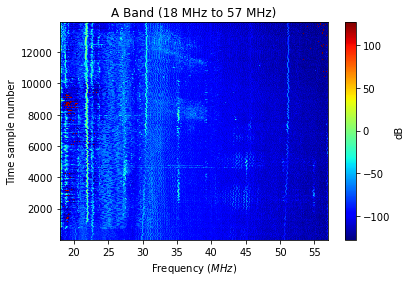

In [25]:
plt.pcolormesh(A_band_frequencies, time_instances, A_band_df, cmap = cm.get_cmap("jet"))
plt.ylabel("Time sample number")
plt.xlabel("Frequency $(MHz)$")
plt.title("A Band (18 MHz to 57 MHz)")
plt.colorbar(label = "dB")
plt.savefig("Culgoora A Band Spectrum.png", dpi = 600);

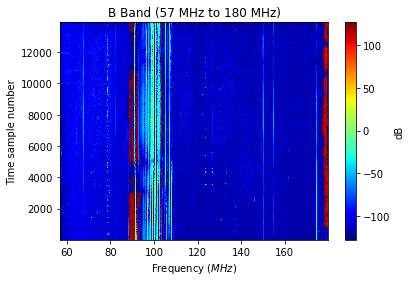

In [26]:
plt.pcolormesh(B_band_frequencies, time_instances, B_band_df, cmap = cm.get_cmap("jet"))
plt.ylabel("Time sample number")
plt.xlabel("Frequency $(MHz)$")
plt.title("B Band (57 MHz to 180 MHz)")
plt.colorbar(label = "dB")
plt.savefig("Culgoora B Band Spectrum.png", dpi = 600);

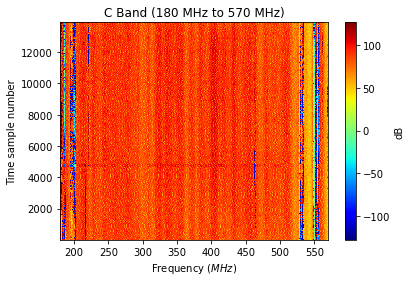

In [27]:
plt.pcolormesh(C_band_frequencies, time_instances, C_band_df, cmap = cm.get_cmap("jet"))
plt.ylabel("Time sample number")
plt.xlabel("Frequency $(MHz)$")
plt.title("C Band (180 MHz to 570 MHz)")
plt.colorbar(label = "dB")
plt.savefig("Culgoora C Band Spectrum.png", dpi = 600);

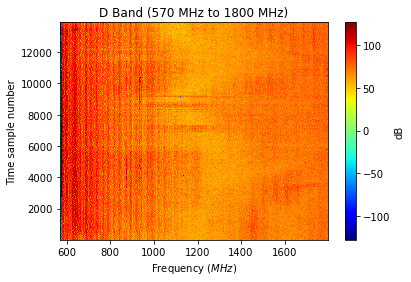

In [28]:
plt.pcolormesh(D_band_frequencies, time_instances, D_band_df, cmap = cm.get_cmap("jet"))
plt.ylabel("Time sample number")
plt.xlabel("Frequency $(MHz)$")
plt.title("D Band (570 MHz to 1800 MHz)")
plt.colorbar(label = "dB")
plt.savefig("Culgoora D Band Spectrum.png", dpi = 600);